<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных,-расчёт-ключевых-параметров-пользовательского-поведения" data-toc-modified-id="Предобработка-данных,-расчёт-ключевых-параметров-пользовательского-поведения-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных, расчёт ключевых параметров пользовательского поведения</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-пропуски,-дубликаты-и-аномалии.-Трансформация-таблиц" data-toc-modified-id="Проверка-на-пропуски,-дубликаты-и-аномалии.-Трансформация-таблиц-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверка на пропуски, дубликаты и аномалии. Трансформация таблиц</a></span></li><li><span><a href="#Расчёт-ключевых-параметров-пользовательского-поведения" data-toc-modified-id="Расчёт-ключевых-параметров-пользовательского-поведения-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Расчёт ключевых параметров пользовательского поведения</a></span></li></ul></li><li><span><a href="#Анализ-пользовательского-поведения" data-toc-modified-id="Анализ-пользовательского-поведения-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ пользовательского поведения</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Вывод.-Определение-более-выгодного-для-компании-тарифа" data-toc-modified-id="Вывод.-Определение-более-выгодного-для-компании-тарифа-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод. Определение более выгодного для компании тарифа</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

Данное исследование предназначено для коммерческого департамента компании «Мегалайн». 

**Цель исследования** — определить, какой из тарифов - «Смарт» или «Ультра» - более выгодный для компании.

**Ход исследования:**

Анализ тарифов проведём на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 
Данные о поведении пользователей мы получим из файлов `calls.csv`, `internet.csv`, `messages.csv`, `tariffs.csv`, `users.csv`.

О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.

Затем, на этапе предобработки, мы проверим данные на ошибки, оценим их влияние на исследование и попробуем исправить. А также рассчитаем ключевые параметры для каждого пользователя:

* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя.

На третьем этапе опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построем гистограммы. Опишем распределения.

Далее проверим две гипотезы:
* средние расходы пользователей тарифов «Ультра» и «Смарт» различаются;
* средние расходы пользователей из Москвы отличаются от расходов пользователей из других регионов.
 
Таким образом, исследование пройдёт в пять этапов:
 1. Обзор данных.
 2. Предобработка данных, расчёт ключевых параметров пользовательского поведения.
 3. Анализ пользовательского поведения.
 4. Проверка гипотез.
 5. Вывод. Определение более выгодного для компании тарифа.

**Примечание**:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

## Обзор данных

Составим первое представление о данных.

Прочитаем исходные файлы, сохраним их, выведем на экран первые пять строк каждого из них и общую информацию для ознакомления.

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
from scipy import stats as st

In [2]:
# чтение файла user и сохранение его в users
users = pd.read_csv('users.csv')
# получение первых 5 строк таблицы user
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [3]:
# получение общей информации о данных в таблице users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
# чтение файла calls и сохранение его в calls
calls = pd.read_csv('calls.csv')
# получение первых 5 строк таблицы calls
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
# получение общей информации о данных в таблице calls
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [6]:
# чтение файла internet и сохранение его в internet
internet = pd.read_csv('internet.csv')
# получение первых 5 строк таблицы internet
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Произошло дублирование индексов, прочитаем файл заново.

In [7]:
# чтение файла internet и сохранение его в internet
internet = pd.read_csv('internet.csv', index_col=0)

In [8]:
# получение общей информации о данных в таблице internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [9]:
# чтение файла messages и сохранение его в messages
messages = pd.read_csv('messages.csv')
# получение первых 5 строк таблицы messages
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
# получение общей информации о данных в таблице messages
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
# чтение файла tariffs и сохранение его в tariffs
tariffs = pd.read_csv('tariffs.csv')
# получение первых 5 строк таблицы tariffs
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Итак, перед нами следующие данные.

**Таблица `users` (информация о пользователях)**:
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

**Таблица `calls` (информация о звонках)**:
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

**Таблица `messages` (информация о сообщениях)**:
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

**Таблица `internet` (информация об интернет-сессиях)**:
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

**Таблица `tariffs` (информация о тарифах)**:
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Данные в таблицах `calls`, `messages`, `internet` необходимо агрегировать до уровня пользователь - месяц, а таблицы `users` и `tariffs` переоформатировать, изменив порядок столбцов.

Мы провели первичное знакомство с имеющимися данными. Теперь необходимо провести указанные трансформации данных, проверить таблицы на наличие ошибок и аномалий, провести округление и агрегацию данных, а также расчёт ключевых параметров.

## Предобработка данных, расчёт ключевых параметров пользовательского поведения

### Проверка на пропуски, дубликаты и аномалии. Трансформация таблиц

Первым делом проверим данные на наличие пропусков.

Как мы видели в предыдущем разделе, пропуски только в `churn_date`, но это нормально. Значит, эти клиенты действующие и у них нет даты расторжения контракта.

Проверим таблицу `users` на наличие явных дубликатов и оценим числовые переменные в ней.

In [12]:
# проверка users на наличие дубликатов
users.duplicated().sum()

0

In [13]:
# оценка числовых переменных таблицы users
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Явных дубликатов нет, аномальных значений тоже.
Проверим ещё уникальные значения столбца `city`.

In [14]:
# вывод уникальных значений столбца 'family_status_id' и их частоты
users['city'].value_counts().head(60)

Москва              99
Санкт-Петербург     39
Новосибирск         16
Казань              14
Омск                14
Уфа                 12
Ульяновск           11
Екатеринбург        11
Краснодар           11
Набережные Челны    11
Самара               9
Челябинск            9
Волгоград            8
Нижний Новгород      8
Пермь                8
Улан-Удэ             7
Вологда              7
Красноярск           7
Новокузнецк          7
Томск                6
Иркутск              6
Киров                6
Тюмень               6
Ростов-на-Дону       6
Воронеж              6
Сочи                 6
Пенза                6
Ставрополь           5
Магнитогорск         5
Махачкала            5
Балашиха             5
Владивосток          5
Тольятти             4
Саранск              4
Калуга               4
Новороссийск         4
Чита                 4
Астрахань            4
Хабаровск            4
Рязань               4
Кострома             4
Петрозаводск         4
Мурманск             4
Владимир   

Проверим данные на наличие отрицательных значений.

In [15]:
# оценка числовых переменных таблицы calls
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [16]:
# оценка числовых переменных таблицы internet
internet.describe()

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


Итак, дополнительных ошибок и аномалий в данных не обнаружено.

Проведём трансформацию двух таблиц: в `users` и `tariffs` поменяем местами столбцы для удобства.

In [17]:
# изменение порядка вывода столбцов в таблице users
users = users.reindex(columns=['user_id','first_name','last_name','age',\
                                   'reg_date', 'churn_date','city','tariff'])
users.head()

,user_id,first_name,last_name,age,reg_date,churn_date,city,tariff
0,1000,Рафаил,Верещагин,52,2018-05-25,NaN,Краснодар,ultra
1,1001,Иван,Ежов,41,2018-11-01,NaN,Москва,smart
2,1002,Евгений,Абрамович,59,2018-06-17,NaN,Стерлитамак,smart
3,1003,Белла,Белякова,23,2018-08-17,NaN,Москва,ultra
4,1004,Татьяна,Авдеенко,68,2018-05-14,NaN,Новокузнецк,ultra


In [18]:
# изменение порядка вывода столбцов в таблице tariffs
tariffs = tariffs.reindex(columns=['tariff_name','rub_monthly_fee',\
                                   'minutes_included', 'messages_included','mb_per_month_included',\
                                   'rub_per_minute', 'rub_per_message', 'rub_per_gb'])
tariffs.head()

,tariff_name,rub_monthly_fee,minutes_included,messages_included,mb_per_month_included,rub_per_minute,rub_per_message,rub_per_gb
0,smart,550,500,50,15360,3,3,200
1,ultra,1950,3000,1000,30720,1,1,150


### Расчёт ключевых параметров пользовательского поведения

Не забудем про округление минут и мегабайтов в соответствии с правилами компании:

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

Округлим минуты.

In [19]:
# округляем в большую сторону значения в столбце duration
calls['duration'] = calls['duration'].apply(np.ceil)
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499
202603,1499_216,2018-10-18,19.0,1499
202604,1499_217,2018-11-10,11.0,1499
202605,1499_218,2018-10-06,5.0,1499


Теперь посчитаем количество разговоров, их общую и среднюю продолжительность для каждого пользователя в месяц.

Для этого столбец `call_date` нужно перевести в формат `datetime` и далее округлить данные до месяца.

In [20]:
# изменение формата столбца call_date 
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
# округление данных в столбце call_date до месяца
calls['call_date'] = calls['call_date'].dt.month

In [21]:
# группировка данных столбцов user_id и call month и расчёт кол-ва звонков в месяц,
# их общей продолжительности и средней длительности одного звонка
calls_sum = calls.groupby(['user_id', 'call_date']).agg({'call_date':['count', 'sum', 'mean']}).reset_index()
calls_sum.head()

user_id call_date                
                    count  sum mean
0    1000         5    22  110    5
1    1000         6    43  258    6
2    1000         7    47  329    7
3    1000         8    52  416    8
4    1000         9    58  522    9

Переименуем столбцы.

In [22]:
# переименование столбцов calls_sum
calls_sum.columns = ['user_id', 'month', 'calls', 'minutes', 'call_mean']
calls_sum.head(10)

,user_id,month,calls,minutes,call_mean
0,1000,5,22,110,5
1,1000,6,43,258,6
2,1000,7,47,329,7
3,1000,8,52,416,8
4,1000,9,58,522,9
5,1000,10,57,570,10
6,1000,11,43,473,11
7,1000,12,46,552,12
8,1001,11,59,649,11
9,1001,12,63,756,12


Теперь рассчитаем отправленное каждым пользователем количество смс в месяц.
Для этого вначале переведём в формат datetime столбец massage_date, а далее округлим данные до месяца.

In [23]:
# изменение формата столбца message_date 
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
# округление данных в столбце message_date до месяца
messages['message_date'] = messages['message_date'].dt.month

In [24]:
# группировка данных столбцов user_id и month и расчёт общего кол-ва смс в месяц
messages_sum = messages.groupby(['user_id', 'message_date']).agg({'message_date':['count']}).reset_index()
messages_sum.head()

user_id message_date      
                       count
0    1000            5    22
1    1000            6    60
2    1000            7    75
3    1000            8    81
4    1000            9    57

Переименуем столбцы.

In [25]:
# переименование столбцов таблицы messages_sum
messages_sum.columns = ['user_id', 'month', 'messages']
messages_sum.head()

,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Теперь обратимся к данным интернет-трафика.
Преобразуем формат столбца `session_date` аналогично предыдущим таблицам.

In [26]:
# изменение формата столбца session_date 
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
# округление данных в столбце session_date до месяца
internet['session_date'] = internet['session_date'].dt.month
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,11,1000
1,1000_1,1052.81,9,1000
2,1000_2,1197.26,6,1000
3,1000_3,550.27,8,1000
4,1000_4,302.56,9,1000


Посчитаем пользовательский трафик за каждый месяц.

In [27]:
# группировка данных столбцов user_id и month и расчёт общего интернет-трафика за месяц
internet_sum = internet.groupby(['user_id', 'session_date']).agg({'mb_used':['sum']}).reset_index()
internet_sum.head(10)

,user_id,session_date,mb_used
,,,sum
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
5,1000,10,14702.49
6,1000,11,14756.47
7,1000,12,9817.61
8,1001,11,18429.34


In [28]:
# подсчёт числа гигабайтов трафика в месяц
internet_sum['gb_used'] = internet_sum['mb_used'] / 1024
internet_sum

,user_id,session_date,mb_used,gb_used
,,,sum,
0,1000,5,2253.49,2.200674
1,1000,6,23233.77,22.689229
2,1000,7,14003.64,13.675430
3,1000,8,14055.93,13.726494
4,1000,9,14568.91,14.227451
...,...,...,...,...
3198,1498,10,20579.36,20.097031
3199,1499,9,1845.75,1.802490
3200,1499,10,17788.51,17.371592


Посчитаем количество гигабайт, а потом округлим их в большую сторону, согласно Правилам компании. 

In [29]:
# округление в большую сторону значения объёма трафика
internet_sum['gb_used'] = internet_sum['gb_used'].apply(np.ceil)
internet_sum.head(10)

,user_id,session_date,mb_used,gb_used
,,,sum,
0,1000,5,2253.49,3.0
1,1000,6,23233.77,23.0
2,1000,7,14003.64,14.0
3,1000,8,14055.93,14.0
4,1000,9,14568.91,15.0
5,1000,10,14702.49,15.0
6,1000,11,14756.47,15.0
7,1000,12,9817.61,10.0
8,1001,11,18429.34,18.0


Переименуем столбцы и удалим трафик в мегабайтах.

In [30]:
# переименование столбцов internet_sum
internet_sum.columns = ['user_id', 'month', 'mb', 'gb']

In [31]:
# удаление столбца mb
internet_sum = internet_sum[['user_id', 'month', 'gb']]
internet_sum.head()

,user_id,month,gb
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0


Итак, мы посчитали ключевые параметры пользовательского поведения в месяц. Теперь объединим данные таблиц `users`, `calls_sum`, `messages_sum`, `internet_sum` в сводную таблицу.

Сначала объединим таблицы со звонками, сообщениями и интернет-трафиком в таблицу `summary`.

In [32]:
# создание таблицы summary на основе calls_sum, messages_sum и internet_sum
summary = calls_sum
summary = summary.merge(messages_sum, on = ['user_id', 'month'], how='outer')
summary = summary.merge(internet_sum, on = ['user_id', 'month'], how='outer')
summary.head(10)

,user_id,month,calls,minutes,call_mean,messages,gb
0,1000,5,22.0,110.0,5.0,22.0,3.0
1,1000,6,43.0,258.0,6.0,60.0,23.0
2,1000,7,47.0,329.0,7.0,75.0,14.0
3,1000,8,52.0,416.0,8.0,81.0,14.0
4,1000,9,58.0,522.0,9.0,57.0,15.0
5,1000,10,57.0,570.0,10.0,73.0,15.0
6,1000,11,43.0,473.0,11.0,58.0,15.0
7,1000,12,46.0,552.0,12.0,70.0,10.0
8,1001,11,59.0,649.0,11.0,NaN,18.0
9,1001,12,63.0,756.0,12.0,NaN,14.0


Оценим типы данных, числовые переменные и пропуски в полученной таблице `summary`.

In [33]:
# вывод информации о типах данных в таблице summary
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    3214 non-null   int64  
 1   month      3214 non-null   int64  
 2   calls      3174 non-null   float64
 3   minutes    3174 non-null   float64
 4   call_mean  3174 non-null   float64
 5   messages   2717 non-null   float64
 6   gb         3203 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 200.9 KB


In [34]:
# оценка числовых переменных таблицы summary
summary.describe()

,user_id,month,calls,minutes,call_mean,messages,gb
count,3214.000000,3214.000000,3174.000000,3174.000000,3174.000000,2717.000000,3203.000000
mean,1251.590230,8.317362,63.833333,547.311279,8.311594,45.283769,17.358414
std,144.659172,2.905413,32.678036,361.673144,2.910625,35.051363,7.343379
min,1000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1125.000000,6.000000,41.000000,282.500000,6.000000,19.000000,13.000000
50%,1253.000000,9.000000,63.000000,495.000000,9.000000,38.000000,17.000000
75%,1378.750000,11.000000,83.000000,749.750000,11.000000,63.000000,21.000000
max,1499.000000,12.000000,244.000000,2928.000000,12.000000,224.000000,49.000000


In [35]:
# подсчёт пропусков
summary.isna().sum()

user_id        0
month          0
calls         40
minutes       40
call_mean     40
messages     497
gb            11
dtype: int64

Заменим пропуски в столбце `calls`, `minutes`, `call_mean`, `messages`, `gb` на нули и трансформируем тип данных в этих стоблцах из вещественного в целочисленный.

In [36]:
# замена пропущенных значений на ноль
summary['calls'] = summary['calls'].fillna(0)
summary['minutes'] = summary['minutes'].fillna(0)
summary['call_mean'] = summary['call_mean'].fillna(0)
summary['messages'] = summary['messages'].fillna(0)
summary['gb'] = summary['gb'].fillna(0)

In [37]:
# изменение типа данных с float64 на int64
summary['calls'] = summary['calls'].astype('int64')
summary['minutes'] = summary['minutes'].astype('int64')
summary['call_mean'] = summary['call_mean'].astype('int64')
summary['messages'] = summary['messages'].astype('int64')
summary['gb'] = summary['gb'].astype('int64')

Проверим полученный результат.

In [38]:
# вывод информации о типах данных в таблице summary
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   user_id    3214 non-null   int64
 1   month      3214 non-null   int64
 2   calls      3214 non-null   int64
 3   minutes    3214 non-null   int64
 4   call_mean  3214 non-null   int64
 5   messages   3214 non-null   int64
 6   gb         3214 non-null   int64
dtypes: int64(7)
memory usage: 200.9 KB


Объединим полученные таблицы в одну `total`.

In [68]:
# объединение таблиц users и summary
total = users.merge(summary, on = 'user_id', how='outer')
total

,user_id,first_name,last_name,age,reg_date,churn_date,city,tariff,month,calls,minutes,call_mean,messages,gb
0,1000,Рафаил,Верещагин,52,2018-05-25,NaN,Краснодар,ultra,5,22,110,5,22,3
1,1000,Рафаил,Верещагин,52,2018-05-25,NaN,Краснодар,ultra,6,43,258,6,60,23
2,1000,Рафаил,Верещагин,52,2018-05-25,NaN,Краснодар,ultra,7,47,329,7,75,14
3,1000,Рафаил,Верещагин,52,2018-05-25,NaN,Краснодар,ultra,8,52,416,8,81,14
4,1000,Рафаил,Верещагин,52,2018-05-25,NaN,Краснодар,ultra,9,58,522,9,57,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,Павел,Гончаров,35,2018-08-15,NaN,Санкт-Петербург,smart,9,0,0,0,32,17
3210,1489,Павел,Гончаров,35,2018-08-15,NaN,Санкт-Петербург,smart,10,0,0,0,21,20
3211,1489,Павел,Гончаров,35,2018-08-15,NaN,Санкт-Петербург,smart,11,0,0,0,20,18
3212,1489,Павел,Гончаров,35,2018-08-15,NaN,Санкт-Петербург,smart,12,0,0,0,35,17


Теперь мы можем рассчитать месячную выручку компании по каждому клиенту. 

Для этого вычтем объём минут, смс и Гб, входящих в выбранный клиентом тариф, умножим остаток на цену сверхлимитного потребления и полученный перерасход `surcharge` сложим с ежемесячной абонплатой.

In [69]:
# выведем на экран условия тарифных планов
tariffs.head()

,tariff_name,rub_monthly_fee,minutes_included,messages_included,mb_per_month_included,rub_per_minute,rub_per_message,rub_per_gb
0,smart,550,500,50,15360,3,3,200
1,ultra,1950,3000,1000,30720,1,1,150


In [70]:
# расчёт суммы расхода пользователя сверх месячной абонплаты
def surcharge(row):
    tariff = row['tariff']
    minutes = row['minutes']
    messages = row['messages']
    gb = row['gb']
    surcharge = 0
    if tariff == 'smart':
        if minutes > 500:
            surcharge += (minutes - 500) * 3
        if messages > 50:
            surcharge += (messages - 50) * 3
        if gb > 15360/1024:
            surcharge += (gb - 15) * 200
        return surcharge
    else:
        if minutes > 3000:
            surcharge += (minutes - 3000) * 1
        if messages > 1000:
            surcharge += (messages - 1000) * 1
        if gb > 30720/1024:
            surcharge += (gb - 30) * 150
        return surcharge
total['surcharge'] = total.apply(surcharge, axis=1)

Для расчёта совокупного расхода клиента к перерасходу добавим сумму месячной абонплаты. Полученный результат назовём `expenses`.

In [71]:
# расчёт суммы совокупного расхода пользователя в месяц
def expenses(row):
    tariff = row['tariff']
    surcharge = row['surcharge']
    expenses = 0
    if tariff == 'smart':
        expenses = surcharge + 550
        return expenses
    else:
        expenses = surcharge + 1950
        return expenses
total['expenses'] = total.apply(expenses, axis=1)

In [72]:
total

,user_id,first_name,last_name,age,reg_date,churn_date,city,tariff,month,calls,minutes,call_mean,messages,gb,surcharge,expenses
0,1000,Рафаил,Верещагин,52,2018-05-25,NaN,Краснодар,ultra,5,22,110,5,22,3,0,1950
1,1000,Рафаил,Верещагин,52,2018-05-25,NaN,Краснодар,ultra,6,43,258,6,60,23,0,1950
2,1000,Рафаил,Верещагин,52,2018-05-25,NaN,Краснодар,ultra,7,47,329,7,75,14,0,1950
3,1000,Рафаил,Верещагин,52,2018-05-25,NaN,Краснодар,ultra,8,52,416,8,81,14,0,1950
4,1000,Рафаил,Верещагин,52,2018-05-25,NaN,Краснодар,ultra,9,58,522,9,57,15,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,Павел,Гончаров,35,2018-08-15,NaN,Санкт-Петербург,smart,9,0,0,0,32,17,400,950
3210,1489,Павел,Гончаров,35,2018-08-15,NaN,Санкт-Петербург,smart,10,0,0,0,21,20,1000,1550
3211,1489,Павел,Гончаров,35,2018-08-15,NaN,Санкт-Петербург,smart,11,0,0,0,20,18,600,1150
3212,1489,Павел,Гончаров,35,2018-08-15,NaN,Санкт-Петербург,smart,12,0,0,0,35,17,400,950


Данные подготовлены, сводная таблица в разделе клиент - месяц сформирована, подсчитаны ключевые параметры пользовательского поведения за месяц. Теперь можем проводить анализ пользователей.

## Анализ пользовательского поведения

In [45]:
# оценка числовых переменных таблицы total
total.describe()

,user_id,age,month,calls,minutes,call_mean,messages,gb,surcharge,expenses
count,3216.000000,3216.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3216.000000,3216.000000
mean,1251.588930,46.643968,8.317362,63.038892,540.499689,8.208152,38.281269,17.299004,720.606654,1699.835510
std,144.645928,16.581233,2.905413,33.236368,364.502118,3.035722,36.148326,7.400584,976.954789,924.945185
min,1000.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,1125.000000,32.000000,6.000000,40.000000,276.000000,6.000000,9.000000,13.000000,0.000000,950.000000
50%,1253.000000,46.000000,9.000000,62.000000,492.000000,9.000000,30.000000,17.000000,289.000000,1950.000000
75%,1378.250000,62.000000,11.000000,82.000000,744.000000,11.000000,57.000000,21.000000,1200.000000,1950.000000
max,1499.000000,75.000000,12.000000,244.000000,2928.000000,12.000000,224.000000,49.000000,7987.000000,8537.000000


Итак, у нас данные о 500 пользователей "Мегалайна" в возрасте от 18 до 75 лет. Кто-то из них пользовался услугами компании весь год, кто-то - только один месяц. В среднем 1 пользователь совершал в месяц 64 звонка общей продолжительностью 547 минут, отправлял 38 смс-сообщений и использовал 17 Гб интернет-трафика. Однако некоторые совсем не пользовались интернетом и не отправляли сообщений, а некоторые говорили почти по 3000 минут в месяц, отправляли 224 смс-ки и использовали 49 Гб интернета. Клиенты "Мегалайна" очень разные.

Проанализируем поведение клиентов оператора в зависимости от их тарифа.

In [46]:
# создадим таблицу с пользователями тарифа smart
total_smart = total.query('tariff == "smart"')
total_smart

,user_id,first_name,last_name,age,reg_date,churn_date,city,tariff,month,calls,minutes,call_mean,messages,gb,surcharge,expenses
8,1001,Иван,Ежов,41,2018-11-01,NaN,Москва,smart,11.0,59.0,649.0,11.0,0.0,18.0,1047.0,1597.0
9,1001,Иван,Ежов,41,2018-11-01,NaN,Москва,smart,12.0,63.0,756.0,12.0,0.0,14.0,768.0,1318.0
10,1002,Евгений,Абрамович,59,2018-06-17,NaN,Стерлитамак,smart,6.0,15.0,90.0,6.0,4.0,11.0,0.0,550.0
11,1002,Евгений,Абрамович,59,2018-06-17,NaN,Стерлитамак,smart,7.0,26.0,182.0,7.0,11.0,18.0,600.0,1150.0
12,1002,Евгений,Абрамович,59,2018-06-17,NaN,Стерлитамак,smart,8.0,42.0,336.0,8.0,13.0,20.0,1000.0,1550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,Всеволод,Акимчин,68,2018-07-19,2018-10-25,Владикавказ,smart,10.0,41.0,410.0,10.0,42.0,21.0,1200.0,1750.0
3212,1499,Гектор,Корнилов,35,2018-09-27,NaN,Пермь,smart,9.0,9.0,81.0,9.0,11.0,2.0,0.0,550.0
3213,1499,Гектор,Корнилов,35,2018-09-27,NaN,Пермь,smart,10.0,68.0,680.0,10.0,48.0,18.0,1140.0,1690.0
3214,1499,Гектор,Корнилов,35,2018-09-27,NaN,Пермь,smart,11.0,74.0,814.0,11.0,59.0,18.0,1569.0,2119.0


In [47]:
# создадим таблицу с пользователями тарифа ultra
total_ultra = total.query('tariff == "ultra"')
total_ultra

,user_id,first_name,last_name,age,reg_date,churn_date,city,tariff,month,calls,minutes,call_mean,messages,gb,surcharge,expenses
0,1000,Рафаил,Верещагин,52,2018-05-25,NaN,Краснодар,ultra,5.0,22.0,110.0,5.0,22.0,3.0,0.0,1950.0
1,1000,Рафаил,Верещагин,52,2018-05-25,NaN,Краснодар,ultra,6.0,43.0,258.0,6.0,60.0,23.0,0.0,1950.0
2,1000,Рафаил,Верещагин,52,2018-05-25,NaN,Краснодар,ultra,7.0,47.0,329.0,7.0,75.0,14.0,0.0,1950.0
3,1000,Рафаил,Верещагин,52,2018-05-25,NaN,Краснодар,ultra,8.0,52.0,416.0,8.0,81.0,14.0,0.0,1950.0
4,1000,Рафаил,Верещагин,52,2018-05-25,NaN,Краснодар,ultra,9.0,58.0,522.0,9.0,57.0,15.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,1495,Авксентий,Фокин,65,2018-08-28,NaN,Иркутск,ultra,8.0,17.0,136.0,8.0,13.0,3.0,0.0,1950.0
3189,1495,Авксентий,Фокин,65,2018-08-28,NaN,Иркутск,ultra,9.0,112.0,1008.0,9.0,82.0,33.0,450.0,2400.0
3190,1495,Авксентий,Фокин,65,2018-08-28,NaN,Иркутск,ultra,10.0,152.0,1520.0,10.0,82.0,29.0,0.0,1950.0
3191,1495,Авксентий,Фокин,65,2018-08-28,NaN,Иркутск,ultra,11.0,129.0,1419.0,11.0,79.0,39.0,1350.0,3300.0


Оценим числовые переменные каждой из двух выборок.

In [48]:
# оценка числовых переменных таблицы пользователей тарифа smart
total_smart.describe()

,user_id,age,month,calls,minutes,call_mean,messages,gb,surcharge,expenses
count,2230.000000,2230.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2230.000000,2230.000000
mean,1246.562332,46.557848,8.346792,58.463437,504.138179,8.321669,33.384029,16.328847,986.152915,1536.152915
std,146.110501,16.349865,2.920316,25.939858,304.117674,2.949939,28.227876,5.747061,1041.182004,1041.182004
min,1001.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,1121.000000,32.000000,6.000000,40.000000,280.000000,6.000000,10.000000,13.000000,66.750000,616.750000
50%,1240.000000,47.000000,9.000000,60.000000,480.000000,9.000000,28.000000,17.000000,750.000000,1300.000000
75%,1376.000000,62.000000,11.000000,76.000000,693.000000,11.000000,51.000000,20.000000,1526.750000,2076.750000
max,1499.000000,75.000000,12.000000,198.000000,2376.000000,12.000000,143.000000,38.000000,7987.000000,8537.000000


In [49]:
# оценка числовых переменных таблицы пользователей тарифа ultra
total_ultra.describe()

,user_id,age,month,calls,minutes,call_mean,messages,gb,surcharge,expenses
count,986.000000,986.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,986.000000,986.000000
mean,1262.957404,46.838742,8.250761,73.392893,622.783756,7.951269,49.363452,19.494416,120.030426,2070.030426
std,140.689268,17.099807,2.871762,43.916853,463.293331,3.208167,47.804457,9.853511,376.015578,376.015578
min,1000.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000
25%,1143.000000,30.000000,6.000000,41.000000,264.000000,6.000000,6.000000,12.000000,0.000000,1950.000000
50%,1277.000000,45.000000,9.000000,74.000000,540.000000,8.000000,38.000000,19.000000,0.000000,1950.000000
75%,1381.000000,63.000000,11.000000,104.000000,904.000000,11.000000,79.000000,27.000000,0.000000,1950.000000
max,1495.000000,75.000000,12.000000,244.000000,2928.000000,12.000000,224.000000,49.000000,2850.000000,4800.000000


Посмотрим, чем отличаются друг от друга две выборки.

Клиенты тарифа `smart` в среднем разговаривают 504 минуты в месяц (медианна 480 минут), отправляют 33 сообщений (медиана 28 смс) и используют 16,3 Гб трафика (медиана 17 Гб). В результате тратят в среднем 1536 рублей в месяц (медиана 1300 рублей). Стандартное отклонение составляет 304 минуты, 28,23 смс и 5,75 Гб. Квадрат этих значений является дисперсией.

Значительно меньшее число клиентов выбирают тариф `ultra`. Они в среднем разговаривают 623 минуты в месяц (медианна 540 минут), отправляют 49 сообщений (медиана 38 смс) и используют 19,5 Гб трафика (медиана 19 Гб). В результате тратят в среднем 2070 рублей в месяц (медиана 1950 рублей). 

Почти все клиенты `ultra` укладываются в лимиты тарифа по количеству минут, смс-сообщений и интернет-трафику и переплачивают в среднем лишь 120 рублей в месяц - и то лишь за счёт аномальных выбросов с переплатами до 2850 рублей в месяц.

Стандартное отклонение составляет 463 минуты, 47,8 смс и 9,85 Гб. Квадрат этих значений является дисперсией.

Таким образом, по продолжительности звонков и количеству трафика две выборки мало отличаются (на 24% и 19% соответственно). Пользователи `ultra` больше отрпавляют существенно больше сообщений (на 48%). При этом среднемесячный расход на втором тарифе выше на 35% (на 534 рубля) за счёт более высокой абонентской платы.

Построим гистограммы для того и другого тарифа.

<AxesSubplot:>

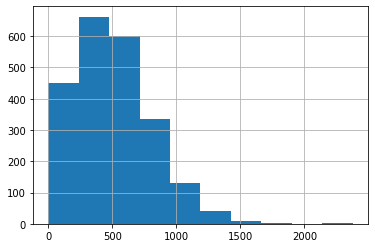

In [50]:
# построение гистограммы распределения общей продолжительности звонков
# пользователей тарифа smart
total_smart['minutes'].hist()

Построим "график с усами".

<AxesSubplot:>

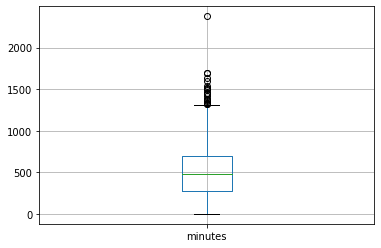

In [51]:
total_smart.boxplot(column='minutes')

Оба графика показывают скошенность вправо, что было видно и из сравнения средней и медианы. Заметно и наличие выбросов - аномальных значений свыше 1350 минут в месяц.

<AxesSubplot:>

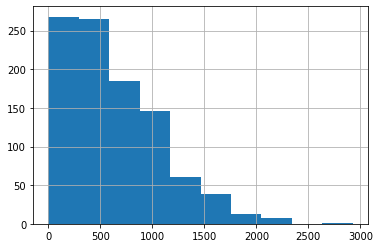

In [52]:
# построение гистограммы распределения общей продолжительности звонков
# пользователей тарифа ultra
total_ultra['minutes'].hist()

<AxesSubplot:>

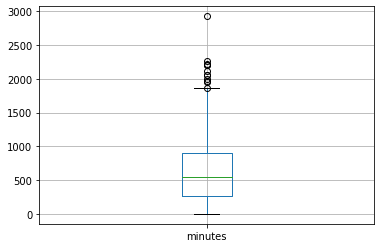

In [53]:
total_ultra.boxplot(column='minutes')

Данные также скошены вправо и имеют выбросы - аномальные значения свыше 1900 минут в месяц. При этом выбросов меньше, чем на тарифе `smart`.

Теперь посмотрим на распределение смс-сообщений.

<AxesSubplot:>

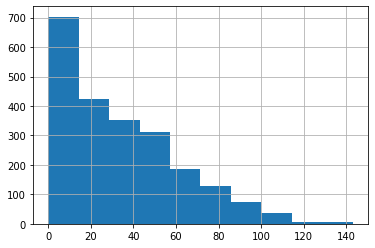

In [54]:
# построение гистограммы распределения количества смс-сообщений
# пользователей тарифа smart
total_smart['messages'].hist()

<AxesSubplot:>

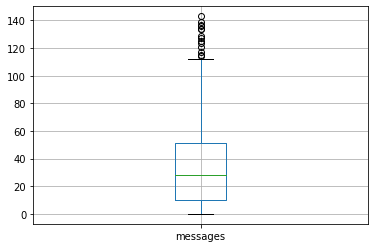

In [55]:
total_smart.boxplot(column='messages')

Распределение также скошено вправо, а выбросы (аномальные значения больше 115 сообщений) менее заметны. Большинство пользователей `smart` вполне укладываются в лимит 50 сообщений для тарифа.

<AxesSubplot:>

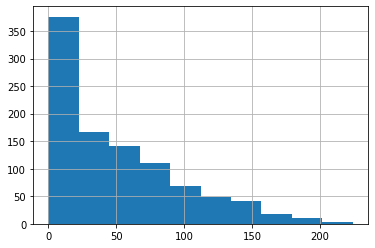

In [56]:
# построение гистограммы распределения количества смс-сообщений
# пользователей тарифа ultra
total_ultra['messages'].hist()

<AxesSubplot:>

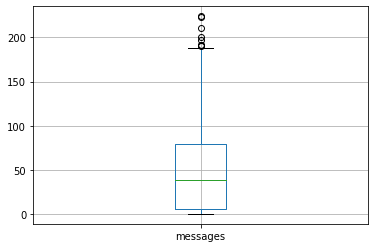

In [57]:
total_ultra.boxplot(column='messages')

Ситуация по скошенностью и выбросами для пользователей тарифа `ultra` ещё менее выражена. И это объяснимо - в их тариф включено до 1000 сообщений в месяц.

Теперь проанализируем интернет-трафик.

<AxesSubplot:>

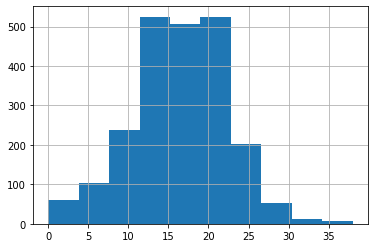

In [58]:
# построение гистограммы распределения потребления интернет-трафика
# пользователей тарифа smart
total_smart['gb'].hist()

<AxesSubplot:>

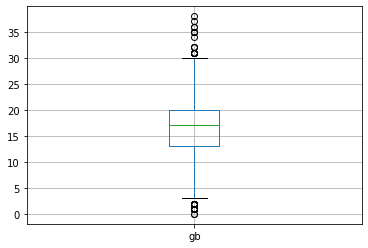

In [59]:
total_smart.boxplot(column='gb')

Распределение интернет-трафика у клиентов тарифа `smart` - нормальное. А количество выбросов со значением выше 30 Гб в месяц - минимально. Чего не скажешь о выбросах менее 3 Гб в месяц - распределение скошено влево.

<AxesSubplot:>

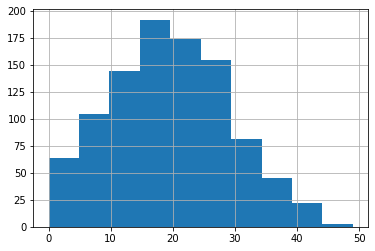

In [60]:
# построение гистограммы распределения потребления интернет-трафика
# пользователей тарифа ultra
total_ultra['gb'].hist()

<AxesSubplot:>

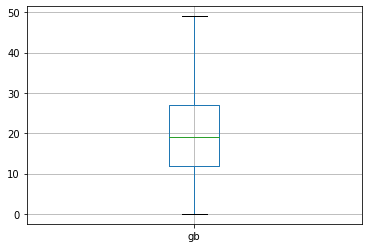

In [61]:
total_ultra.boxplot(column='gb')

На тарифе `ultra` распределение приближено к нормальному, а выбросы отсутствуют - все пользуются интернетом в диапазоне от 0 до 50 Гб в месяц.

Рассмотрим ещё распределение совокупных ежемесячных расходов клиентов.

<AxesSubplot:>

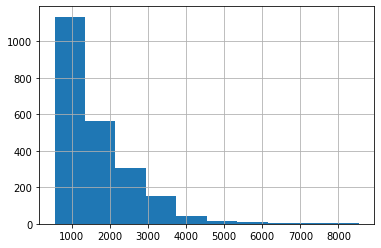

In [62]:
# построение гистограммы распределения совокупных ежемесячных расходов
# пользователей тарифа smart
total_smart['expenses'].hist()

<AxesSubplot:>

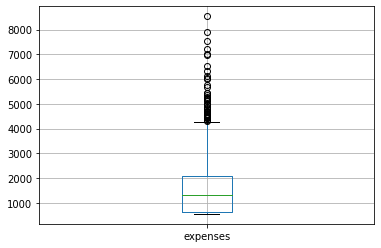

In [63]:
total_smart.boxplot(column='expenses')

Мы видим большое число выбросов свыше 4200 рублей в месяц и совсем аномального клиента с расходом в 8537 рублей в месяц.

<AxesSubplot:>

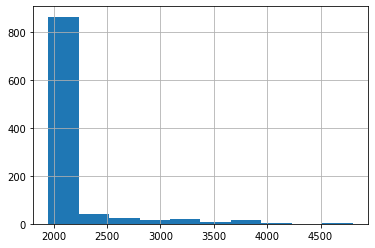

In [64]:
# построение гистограммы распределения совокупных ежемесячных расходов
# пользователей тарифа ultra
total_ultra['expenses'].hist()

<AxesSubplot:>

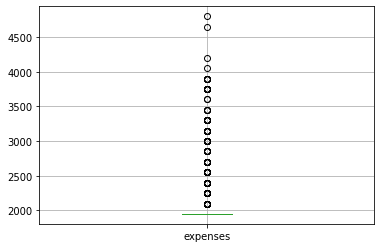

In [65]:
total_ultra.boxplot(column='expenses')

Почти все пользователи тарифа `ultra` укладываются в абонплату 1950 рублей в месяц. Исключение составляют около сотни аномальных выбросов.

Итак, мы оценили поведение клиентов оператора, исходя из выбранного ими тарифа. Посчитали потребляемое ими количество минут, сообщений и интернет-трафика - среднее и стандартное отклонение. Построили гистограммы и описали распределения данных. Проанализировали их ежемесячные расходы на связь - они отличаются в среднем лишь на 35%, при том, что абонплаты отличаются почти в 4 раза.

Перейдём теперь к проверке гипотез.

## Проверка гипотез

Проверим две гипотезы:

* средние расходы пользователей тарифов «Ультра» и «Смарт» различаются;
* средние расходы пользователей из Москвы отличаются от расходов пользователей из других регионов.

Распределение значений расходов пользователей обоих тарифов отличаются от нормального. Генеральные совокупности не зависят друг от друга. А поскольку параметры двух категорий клиентов мало отличаются (продолжительность звонков, количество сообщений и интернет-трафика), предположим равенство их дисперсий.

Нулевая гипотеза состоит в равенстве средних расходов пользователей тарифов «Ультра» и «Смарт».
Альтернативная гипотеза - что средние расходы пользователей тарифов «Ультра» и «Смарт» не равны.

In [66]:
# проверка нулевой гипотезы о равенстве средних двух независимых генеральных
# совокупностей smart и ultra
smart = total_smart['expenses']
ultra = total_ultra['expenses']
alpha = 0.05
results = st.ttest_ind(smart, ultra)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем H0")
else:
    print("Не получилось отвергнуть H0")

p-значение: 2.728112531074669e-53
Отвергаем H0


Проверка показала, что различие средних расходов пользователей тарифов «Ультра» и «Смарт» статистически значимо и неслучайно. И это ожидаемо - слишком большая разница между средними расходами, которая сформировалась за счёт четырёхкратной разницы в абонентской плате.

Проверим вторую гипотезу.
Нулевая гипотеза - что средние расходы пользователей из Москвы и других регионов не отличаются друг от друга.
Альтернативная гипотеза состоит в том, что средние расходы московских и не-московских пользователей не равны друг другу.

In [67]:
# проверка нулевой гипотезы о равенстве средних двух независимых генеральных
# совокупностей клиентов из Москвы и из других регионов
total_Moscow = total.query('city == "Москва"')['expenses']
total_other = total.query('city != "Москва"')['expenses']
alpha = 0.05
results = st.ttest_ind(total_Moscow, total_other)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем H0")
else:
    print("Не получилось отвергнуть H0")

p-значение: 0.7895369510499006
Не получилось отвергнуть H0


Следовательно, расходы клиентов из Москвы и других регионов статистически не отличаются друг от друга.

Итак, мы проверили две гипотезы: 
* Различие средних расходов пользователей тарифов «Ультра» и «Смарт» статистически значимо и неслучайно.
* Расходы клиентов из Москвы и других регионов статистически не отличаются, тогда как различия пользователей разных тарифов более статистически значимы.

Осталось определить более выгодный для компании тариф.

## Вывод. Определение более выгодного для компании тарифа

Проведённый анализ показал, что продолжительность звонков и объём интернет-трафика на тарифах «Смарт» и «Ультра» отличаются на 24% и 19% соответственно. Количество смс-сообщений разнится более существенно - в среднем на 48%.

При этом абонентская плата на тарифе «Ультра» почти в 4 раза выше, чем у клиентов «Смарт». А суммарные расходы на тарифе «Ультра» выше на 35%, что меньше доп.нагрузки на оборудование и сети.

Отличие сумм ежемесячных расходов на разных тарифах неслучайно и статистически значимо.

Значит, тарифный план «Ультра» более выгоден для компании.